# Пакет `seaborn`

---

**Источники:**

[github.com/mwaskom/seaborn](https://github.com/mwaskom/seaborn)

[https://pypi.org/project/seaborn/](https://pypi.org/project/seaborn/)

[API overview](https://seaborn.pydata.org/tutorial.html)

[How to build beautiful plots with Python and Seaborn](https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn/)

[]()

[]()

[]()


---

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 20.3.3 from /home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

Для примера возьмем [данные (data set) Gapminder World](https://www.kaggle.com/tklimonova/gapminder-datacamp-2007).

In [7]:
df = pd.read_csv('./../../data/gapminder_full.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.35,706.16
1700,Zimbabwe,1992,10704340,Africa,60.38,693.42
1701,Zimbabwe,1997,11404948,Africa,46.81,792.45
1702,Zimbabwe,2002,11926563,Africa,39.99,672.04


In [8]:
# получить сведения о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Обзор пакета `seaborn`

![](./images/logo_seaborn.svg)

[`Seaborn`](https://seaborn.pydata.org/) - это библиотека визуализации `Python`.

`Seaborn` построен поверх `matplotlib` и тесно интегрирован со структурами данных `pandas`.

`Seaborn` предоставляет высокоуровневый интерфейс для рисования привлекательной статистической графики.

ВНИМАНИЕ: `Seaborn` поддерживает Python 3.7+ и больше НЕ поддерживает Python 2.

Каждый модуль имеет одну функцию уровня фигуры (figure), которая предлагает единый интерфейс для различных функций уровня осей.

### Структура основных модулей пакета `seaborn`

Пространство имен `seaborn` плоское. Вся функциональность доступна на верхнем уровне.

Но сам код имеет иерархическую структуру с модулями функций, которые достигают одинаковых целей визуализации с помощью различных средств.

Имеется три основных модуля:
- "относительный (**relational**)"
- "распределительный (**distributional**)"
- "категориальный (**categorical**)".

Структура выглядит примерно так:

![](./images/seaborn_function_overview.png)


### "Длинные (Long-form)" и "широкие (wide-form)" данные

Большинство функций построения графиков в `seaborn` ориентированы на векторы (vectors) данных.

При построении графика `x` от `y` каждая переменная должна быть вектором. 

`Seaborn` принимает наборы данных, в которых несколько векторов организованы в виде таблиц

Существует фундаментальное различие между таблицами данных **длинной формы (long-form)**" и "**широкой формы (wide-form)**", и `seaborn` будет рассматривать каждую по-разному.

При использовании `pandas` для представления данных в широкой форме (wide-form) используется всего несколько переменных (не более трех).

Это связано с тем, что `seaborn` не использует многоиндексную (multi-index) информацию, в которой `pandas` представляет дополнительные переменные в табличном формате.


В общем, можно думать о длинных (long) и широких (wide) наборах данных как о том, что выглядит примерно так:
![](./images/seaborn_longform_wideform_data.png)

#### Данные длинной формы (long-form)

Таблица данных **длинной формы (long-form)** имеет следующие характеристики:
- Каждая переменная представляет собой столбец (variable = column)
- Каждое наблюдение - это строка (observation = row)


В случае данных в **длинной форме (long-form)** столбцам в таблице назначаются роли на графике путем *явного присвоения* им одной из переменных.

Преимущество данных в **длинной форме (long-form)** состоит в том, что они хорошо **подходят для этой явной спецификации графика**.

График может содержать наборы данных произвольной сложности, если можно четко определить переменные и наблюдения.

Но к этому формату нужно привыкнуть, потому что часто это не модель данных, которая имеется "в голове".

In [9]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98


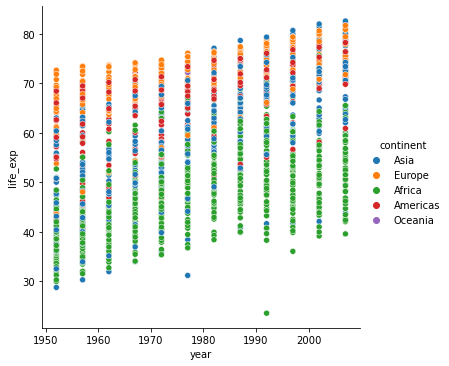

In [10]:
# по умолчанию используется тип scatter
sns.relplot(data=df, 
            x="year", 
            y="life_exp", 
            hue='continent')

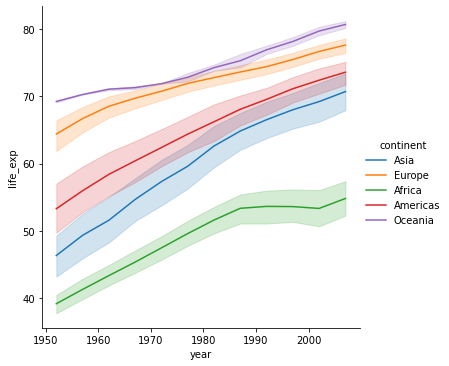

In [11]:
# можно указать тип line
sns.relplot(kind="line",
            data=df, 
            x="year", 
            y="life_exp", 
            hue='continent')

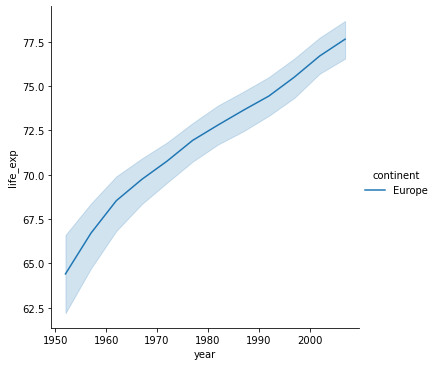

In [12]:
sns.relplot(kind="line",
            data=df[df.continent == "Europe"], 
            x="year", 
            y="life_exp", 
            hue='continent')

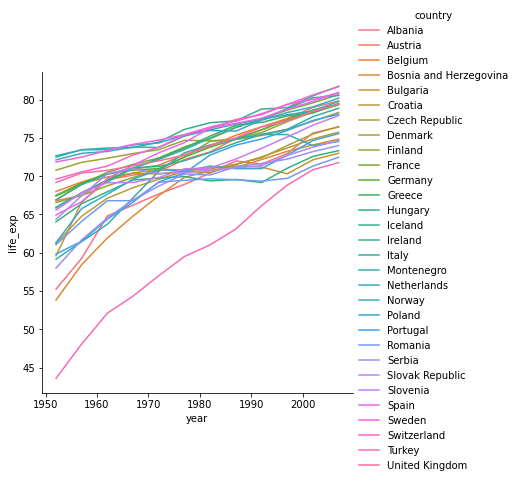

In [13]:
sns.relplot(kind="line",
            data=df[df.continent == "Europe"], 
            x="year", 
            y="life_exp", 
            hue='country')

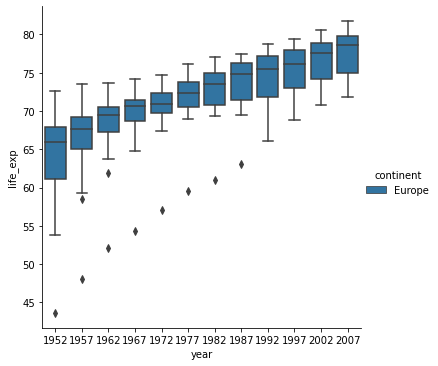

In [14]:
# можно указать тип box
sns.catplot(kind="box",
            data=df[df.continent == "Europe"], 
            x="year", 
            y="life_exp", 
            hue='continent')

#### Данные широкой формы (wide-form)

Для простых наборов данных часто бывает более интуитивно понятным думать о данных так, как они могут быть просмотрены в электронной таблице, где столбцы и строки содержат уровни различных переменных.

Например, можно преобразовать датасет в **широкую форму (wide-form)** сводной таблицей.

Здесь используются те же переменные, но они организованы по-другому. Переменные в этом наборе данных связаны с размерами таблицы, а не с именованными полями.
Каждое наблюдение определяется как значением в ячейке в таблице, так и координатами этой ячейки относительно индексов строки и столбца.

In [15]:
# сумма населения по году и континенту
pvt = df.pivot_table(index='year', 
                     columns='continent',
                     values='life_exp',
                     aggfunc="mean")
pvt

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.14,53.28,46.31,64.41,69.25
1957,41.27,55.96,49.32,66.70,70.30
1962,43.32,58.40,51.56,68.54,71.09
1967,45.33,60.41,54.66,69.74,71.31
1972,47.45,62.39,57.32,70.78,71.91
1977,49.58,64.39,59.61,71.94,72.85
1982,51.59,66.23,62.62,72.81,74.29
1987,53.34,68.09,64.85,73.64,75.32
1992,53.63,69.57,66.54,74.44,76.94


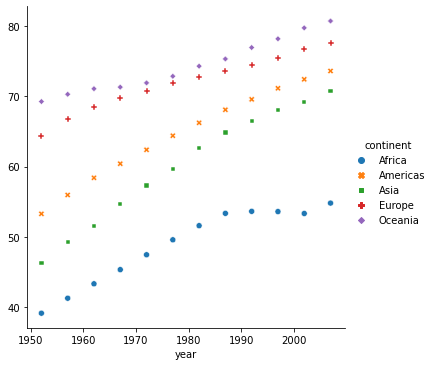

In [16]:
sns.relplot(data=pvt)

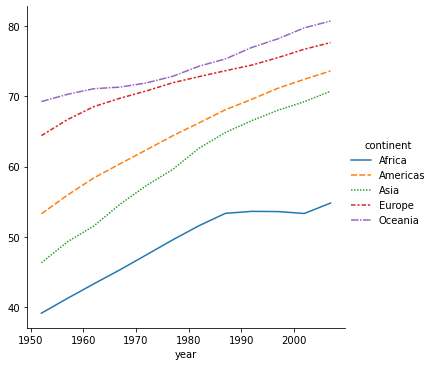

In [17]:
sns.relplot(data=pvt, kind="line")

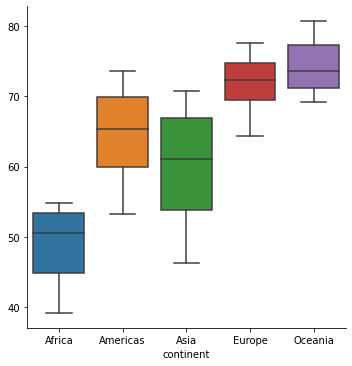

In [18]:
sns.catplot(data=pvt, kind="box")

С данными в **длинной форме (long-form)** можно получить доступ к переменным в наборе данных по их имени.

Это не относится к данным в **широкой форме (wide-form)**. Тем не менее, поскольку существует четкая связь между размерами таблицы и переменной в наборе данных, `seaborn` может назначить этим переменным роли на графике.

## `relplot`

### `scatterplot`

### `lineplot`

## `displot`

### `histplot`